In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from DataGenerator2D import DataGenerator2D
from Models import Resunet
from Evaluation_matrices import iou, f1, dice_coef, dice_coef_loss

# COMPILING MODEL

In [2]:

Resunet = Resunet()
model = Resunet.build_model()
checkpoint = ModelCheckpoint('//PATH TO SAVE YOUR MODEL//', verbose=1, monitor ='val_loss',  save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

callbacks = [ checkpoint, reduce_lr]

opt = tf.keras.optimizers.experimental.Adam(1e-3)
metrics = [f1, iou , dice_coef ]

model.compile(loss=dice_coef_loss,
              optimizer=opt,
              metrics=metrics)

model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_30 (Conv2D)             (None, 256, 256, 16  448         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_28 (BatchN  (None, 256, 256, 16  64         ['conv2d_30[0][0]']              
 ormalization)                  )                                                           

                                                                                                  
 batch_normalization_37 (BatchN  (None, 32, 32, 128)  512        ['conv2d_39[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_41 (Conv2D)             (None, 32, 32, 128)  73856       ['add_11[0][0]']                 
                                                                                                  
 activation_25 (Activation)     (None, 32, 32, 128)  0           ['batch_normalization_37[0][0]'] 
                                                                                                  
 batch_normalization_38 (BatchN  (None, 32, 32, 128)  512        ['conv2d_41[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 batch_normalization_47 (BatchN  (None, 64, 64, 320)  1280       ['concatenate_5[0][0]']          
 ormalization)                                                                                    
                                                                                                  
 activation_32 (Activation)     (None, 64, 64, 320)  0           ['batch_normalization_47[0][0]'] 
                                                                                                  
 conv2d_50 (Conv2D)             (None, 64, 64, 128)  368768      ['activation_32[0][0]']          
                                                                                                  
 batch_normalization_48 (BatchN  (None, 64, 64, 128)  512        ['conv2d_50[0][0]']              
 ormalization)                                                                                    
          

 conv2d_57 (Conv2D)             (None, 256, 256, 32  9248        ['activation_37[0][0]']          
                                )                                                                 
                                                                                                  
 add_17 (Add)                   (None, 256, 256, 32  0           ['batch_normalization_55[0][0]', 
                                )                                 'conv2d_57[0][0]']              
                                                                                                  
 conv2d_59 (Conv2D)             (None, 256, 256, 1)  33          ['add_17[0][0]']                 
                                                                                                  
Total params: 6,287,729
Trainable params: 6,280,433
Non-trainable params: 7,296
__________________________________________________________________________________________________


In [3]:

train_generator = DataGenerator2D('//PATH TO YOUR TRAINING DATA//', img_size=256, batch_size=10, shuffle=True)
val_generator = DataGenerator2D('//PATH TO YOUR TEST DATA//', img_size=256, batch_size=10, shuffle=False)

# Part 3 - Training

history = model.fit(train_generator,
                              validation_data=val_generator,
                              steps_per_epoch=20,
                              validation_steps=10,
                              epochs=100,
                              callbacks=callbacks)

print(history.history.keys())

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 0.7154 - f1: 0.2836 - iou: 0.1722 - dice_coef: 0.2846
Epoch 1: val_loss improved from inf to 0.99203, saving model to E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 42s 1s/step - loss: 0.7154 - f1: 0.2836 - iou: 0.1722 - dice_coef: 0.2846 - val_loss: 0.9920 - val_f1: 0.0077 - val_iou: 0.0042 - val_dice_coef: 0.0080 - lr: 0.0010
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.4864 - f1: 0.5180 - iou: 0.3543 - dice_coef: 0.5136
Epoch 2: val_loss improved from 0.99203 to 0.86932, saving model to E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 20s 1s/step - loss: 0.4864 - f1: 0.5180 - iou: 0.3543 - dice_coef: 0.5136 - val_loss: 0.8693 - val_f1: 0.1312 - val_iou: 0.0708 - val_dice_coef: 0.1307 - lr: 0.0010
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.3536 - f1: 0.6510 - iou: 0.4949 - dice_coef: 0.6464
Epoch 3: val_loss did not improve from 0.86932
20/20 [==============================] - 11s 553ms/step - loss: 0.3536 - f1: 0.6510 - iou: 0.4949 - dice_coef: 0.6464 - val_loss: 0.9997 - val_f1: 9.7810e-05 - val_iou: 2.3531e-04 - val_dice_coef: 2.8388e-04 - lr: 0.0010
Epoch 4/100
20/20 [==============================] - ETA: 0s - loss: 0.3307 - f1: 0.6762 - iou: 0.5242 - dice_coef: 0.6693
Epoch 4: val_loss did not improve from 0.86932
20/20 [==============================] - 13s 642ms/step - loss: 0.3307 - f1: 0.6762 - iou: 0.5242 - dice_coef: 0.6693 - val_loss: 0.9945 - val_f1: 0.0051 - val_iou: 0.0030 - val_dice_coef: 0.0055 - lr: 0.0010
Epoch 5/100
20/20 [=====

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 18s 933ms/step - loss: 0.1945 - f1: 0.8055 - iou: 0.6922 - dice_coef: 0.8055 - val_loss: 0.7676 - val_f1: 0.2354 - val_iou: 0.1399 - val_dice_coef: 0.2324 - lr: 5.0000e-04
Epoch 8/100
20/20 [==============================] - ETA: 0s - loss: 0.1866 - f1: 0.8182 - iou: 0.7148 - dice_coef: 0.8134
Epoch 8: val_loss improved from 0.76762 to 0.73730, saving model to E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 19s 948ms/step - loss: 0.1866 - f1: 0.8182 - iou: 0.7148 - dice_coef: 0.8134 - val_loss: 0.7373 - val_f1: 0.2645 - val_iou: 0.1585 - val_dice_coef: 0.2627 - lr: 5.0000e-04
Epoch 9/100
20/20 [==============================] - ETA: 0s - loss: 0.1705 - f1: 0.8316 - iou: 0.7305 - dice_coef: 0.8295
Epoch 9: val_loss did not improve from 0.73730
20/20 [==============================] - 10s 479ms/step - loss: 0.1705 - f1: 0.8316 - iou: 0.7305 - dice_coef: 0.8295 - val_loss: 0.7503 - val_f1: 0.2523 - val_iou: 0.1517 - val_dice_coef: 0.2497 - lr: 5.0000e-04
Epoch 10/100
20/20 [==============================] - ETA: 0s - loss: 0.1501 - f1: 0.8545 - iou: 0.7704 - dice_coef: 0.8499
Epoch 10: val_loss did not improve from 0.73730
20/20 [==============================] - 10s 521ms/step - loss: 0.1501 - f1: 0.8545 - iou: 0.7704 - dice_coef: 0.8499 - val_loss: 0.8148 - val_f1: 0.1870 - val_iou: 0.1099 - val_dice_coef: 0.1852 - lr: 5.0000e-04
Epoch 11/100
20/20 

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 18s 904ms/step - loss: 0.1096 - f1: 0.8917 - iou: 0.8339 - dice_coef: 0.8904 - val_loss: 0.6694 - val_f1: 0.3333 - val_iou: 0.2113 - val_dice_coef: 0.3306 - lr: 2.5000e-04
Epoch 13/100
20/20 [==============================] - ETA: 0s - loss: 0.1099 - f1: 0.8911 - iou: 0.8313 - dice_coef: 0.8901
Epoch 13: val_loss did not improve from 0.66944
20/20 [==============================] - 10s 467ms/step - loss: 0.1099 - f1: 0.8911 - iou: 0.8313 - dice_coef: 0.8901 - val_loss: 0.6876 - val_f1: 0.3167 - val_iou: 0.2001 - val_dice_coef: 0.3124 - lr: 2.5000e-04
Epoch 14/100
20/20 [==============================] - ETA: 0s - loss: 0.0872 - f1: 0.9126 - iou: 0.8673 - dice_coef: 0.9128
Epoch 14: val_loss improved from 0.66944 to 0.66818, saving model to E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 19s 951ms/step - loss: 0.0872 - f1: 0.9126 - iou: 0.8673 - dice_coef: 0.9128 - val_loss: 0.6682 - val_f1: 0.3370 - val_iou: 0.2160 - val_dice_coef: 0.3318 - lr: 2.5000e-04
Epoch 15/100
20/20 [==============================] - ETA: 0s - loss: 0.1427 - f1: 0.8614 - iou: 0.7858 - dice_coef: 0.8573
Epoch 15: val_loss did not improve from 0.66818
20/20 [==============================] - 10s 485ms/step - loss: 0.1427 - f1: 0.8614 - iou: 0.7858 - dice_coef: 0.8573 - val_loss: 0.6755 - val_f1: 0.3301 - val_iou: 0.2089 - val_dice_coef: 0.3245 - lr: 2.5000e-04
Epoch 16/100
20/20 [==============================] - ETA: 0s - loss: 0.0964 - f1: 0.9032 - iou: 0.8525 - dice_coef: 0.9036
Epoch 16: val_loss improved from 0.66818 to 0.61059, saving model to E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 17s 896ms/step - loss: 0.0964 - f1: 0.9032 - iou: 0.8525 - dice_coef: 0.9036 - val_loss: 0.6106 - val_f1: 0.3944 - val_iou: 0.2585 - val_dice_coef: 0.3894 - lr: 2.5000e-04
Epoch 17/100
20/20 [==============================] - ETA: 0s - loss: 0.0799 - f1: 0.9213 - iou: 0.8790 - dice_coef: 0.9201
Epoch 17: val_loss improved from 0.61059 to 0.59583, saving model to E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 19s 983ms/step - loss: 0.0799 - f1: 0.9213 - iou: 0.8790 - dice_coef: 0.9201 - val_loss: 0.5958 - val_f1: 0.4088 - val_iou: 0.2717 - val_dice_coef: 0.4042 - lr: 2.5000e-04
Epoch 18/100
20/20 [==============================] - ETA: 0s - loss: 0.0767 - f1: 0.9284 - iou: 0.8976 - dice_coef: 0.9233
Epoch 18: val_loss improved from 0.59583 to 0.46747, saving model to E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 19s 956ms/step - loss: 0.0767 - f1: 0.9284 - iou: 0.8976 - dice_coef: 0.9233 - val_loss: 0.4675 - val_f1: 0.5371 - val_iou: 0.3849 - val_dice_coef: 0.5325 - lr: 2.5000e-04
Epoch 19/100
20/20 [==============================] - ETA: 0s - loss: 0.0748 - f1: 0.9235 - iou: 0.8961 - dice_coef: 0.9252
Epoch 19: val_loss improved from 0.46747 to 0.42342, saving model to E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 19s 902ms/step - loss: 0.0748 - f1: 0.9235 - iou: 0.8961 - dice_coef: 0.9252 - val_loss: 0.4234 - val_f1: 0.5809 - val_iou: 0.4293 - val_dice_coef: 0.5766 - lr: 2.5000e-04
Epoch 20/100
20/20 [==============================] - ETA: 0s - loss: 0.0788 - f1: 0.9234 - iou: 0.8856 - dice_coef: 0.9212
Epoch 20: val_loss improved from 0.42342 to 0.35571, saving model to E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 18s 922ms/step - loss: 0.0788 - f1: 0.9234 - iou: 0.8856 - dice_coef: 0.9212 - val_loss: 0.3557 - val_f1: 0.6486 - val_iou: 0.4982 - val_dice_coef: 0.6443 - lr: 2.5000e-04
Epoch 21/100
20/20 [==============================] - ETA: 0s - loss: 0.0952 - f1: 0.9042 - iou: 0.8577 - dice_coef: 0.9048
Epoch 21: val_loss did not improve from 0.35571
20/20 [==============================] - 10s 477ms/step - loss: 0.0952 - f1: 0.9042 - iou: 0.8577 - dice_coef: 0.9048 - val_loss: 0.3748 - val_f1: 0.6314 - val_iou: 0.4787 - val_dice_coef: 0.6252 - lr: 2.5000e-04
Epoch 22/100
20/20 [==============================] - ETA: 0s - loss: 0.0805 - f1: 0.9209 - iou: 0.8807 - dice_coef: 0.9195
Epoch 22: val_loss improved from 0.35571 to 0.28898, saving model to E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 19s 979ms/step - loss: 0.0805 - f1: 0.9209 - iou: 0.8807 - dice_coef: 0.9195 - val_loss: 0.2890 - val_f1: 0.7140 - val_iou: 0.5714 - val_dice_coef: 0.7110 - lr: 2.5000e-04
Epoch 23/100
20/20 [==============================] - ETA: 0s - loss: 0.0527 - f1: 0.9468 - iou: 0.9243 - dice_coef: 0.9472
Epoch 23: val_loss did not improve from 0.28898
20/20 [==============================] - 11s 542ms/step - loss: 0.0527 - f1: 0.9468 - iou: 0.9243 - dice_coef: 0.9472 - val_loss: 0.2951 - val_f1: 0.7085 - val_iou: 0.5676 - val_dice_coef: 0.7049 - lr: 2.5000e-04
Epoch 24/100
20/20 [==============================] - ETA: 0s - loss: 0.0793 - f1: 0.9216 - iou: 0.8870 - dice_coef: 0.9207
Epoch 24: val_loss improved from 0.28898 to 0.24699, saving model to E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 19s 951ms/step - loss: 0.0793 - f1: 0.9216 - iou: 0.8870 - dice_coef: 0.9207 - val_loss: 0.2470 - val_f1: 0.7544 - val_iou: 0.6240 - val_dice_coef: 0.7530 - lr: 2.5000e-04
Epoch 25/100
20/20 [==============================] - ETA: 0s - loss: 0.0585 - f1: 0.9401 - iou: 0.9130 - dice_coef: 0.9415
Epoch 25: val_loss improved from 0.24699 to 0.23266, saving model to E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 20s 989ms/step - loss: 0.0585 - f1: 0.9401 - iou: 0.9130 - dice_coef: 0.9415 - val_loss: 0.2327 - val_f1: 0.7696 - val_iou: 0.6437 - val_dice_coef: 0.7673 - lr: 2.5000e-04
Epoch 26/100
20/20 [==============================] - ETA: 0s - loss: 0.0559 - f1: 0.9476 - iou: 0.9272 - dice_coef: 0.9441
Epoch 26: val_loss improved from 0.23266 to 0.21866, saving model to E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 20s 1s/step - loss: 0.0559 - f1: 0.9476 - iou: 0.9272 - dice_coef: 0.9441 - val_loss: 0.2187 - val_f1: 0.7825 - val_iou: 0.6613 - val_dice_coef: 0.7813 - lr: 2.5000e-04
Epoch 27/100
20/20 [==============================] - ETA: 0s - loss: 0.0752 - f1: 0.9230 - iou: 0.8940 - dice_coef: 0.9248
Epoch 27: val_loss improved from 0.21866 to 0.16730, saving model to E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 19s 973ms/step - loss: 0.0752 - f1: 0.9230 - iou: 0.8940 - dice_coef: 0.9248 - val_loss: 0.1673 - val_f1: 0.8322 - val_iou: 0.7305 - val_dice_coef: 0.8327 - lr: 2.5000e-04
Epoch 28/100
20/20 [==============================] - ETA: 0s - loss: 0.0579 - f1: 0.9467 - iou: 0.9236 - dice_coef: 0.9421
Epoch 28: val_loss did not improve from 0.16730
20/20 [==============================] - 10s 472ms/step - loss: 0.0579 - f1: 0.9467 - iou: 0.9236 - dice_coef: 0.9421 - val_loss: 0.1708 - val_f1: 0.8300 - val_iou: 0.7280 - val_dice_coef: 0.8292 - lr: 2.5000e-04
Epoch 29/100
20/20 [==============================] - ETA: 0s - loss: 0.0656 - f1: 0.9367 - iou: 0.9158 - dice_coef: 0.9344
Epoch 29: val_loss did not improve from 0.16730
20/20 [==============================] - 11s 543ms/step - loss: 0.0656 - f1: 0.9367 - iou: 0.9158 - dice_coef: 0.9344 - val_loss: 0.1715 - val_f1: 0.8294 - val_iou: 0.7248 - val_dice_coef: 0.8285 - lr: 2.5000e-04
Epoch 30/100
20/2

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 18s 895ms/step - loss: 0.0646 - f1: 0.9371 - iou: 0.9083 - dice_coef: 0.9354 - val_loss: 0.1602 - val_f1: 0.8394 - val_iou: 0.7430 - val_dice_coef: 0.8398 - lr: 2.5000e-04
Epoch 31/100
20/20 [==============================] - ETA: 0s - loss: 0.0511 - f1: 0.9484 - iou: 0.9300 - dice_coef: 0.9489
Epoch 31: val_loss did not improve from 0.16017
20/20 [==============================] - 10s 496ms/step - loss: 0.0511 - f1: 0.9484 - iou: 0.9300 - dice_coef: 0.9489 - val_loss: 0.1678 - val_f1: 0.8327 - val_iou: 0.7266 - val_dice_coef: 0.8322 - lr: 2.5000e-04
Epoch 32/100
20/20 [==============================] - ETA: 0s - loss: 0.0532 - f1: 0.9493 - iou: 0.9352 - dice_coef: 0.9468
Epoch 32: val_loss improved from 0.16017 to 0.13608, saving model to E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 18s 928ms/step - loss: 0.0532 - f1: 0.9493 - iou: 0.9352 - dice_coef: 0.9468 - val_loss: 0.1361 - val_f1: 0.8629 - val_iou: 0.7767 - val_dice_coef: 0.8639 - lr: 2.5000e-04
Epoch 33/100
20/20 [==============================] - ETA: 0s - loss: 0.0398 - f1: 0.9591 - iou: 0.9566 - dice_coef: 0.9602
Epoch 33: val_loss did not improve from 0.13608
20/20 [==============================] - 10s 491ms/step - loss: 0.0398 - f1: 0.9591 - iou: 0.9566 - dice_coef: 0.9602 - val_loss: 0.1418 - val_f1: 0.8572 - val_iou: 0.7667 - val_dice_coef: 0.8582 - lr: 2.5000e-04
Epoch 34/100
20/20 [==============================] - ETA: 0s - loss: 0.0312 - f1: 0.9662 - iou: 0.9684 - dice_coef: 0.9688
Epoch 34: val_loss improved from 0.13608 to 0.13133, saving model to E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 18s 909ms/step - loss: 0.0312 - f1: 0.9662 - iou: 0.9684 - dice_coef: 0.9688 - val_loss: 0.1313 - val_f1: 0.8682 - val_iou: 0.7848 - val_dice_coef: 0.8687 - lr: 2.5000e-04
Epoch 35/100
20/20 [==============================] - ETA: 0s - loss: 0.0335 - f1: 0.9666 - iou: 0.9642 - dice_coef: 0.9665
Epoch 35: val_loss improved from 0.13133 to 0.12345, saving model to E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 18s 914ms/step - loss: 0.0335 - f1: 0.9666 - iou: 0.9642 - dice_coef: 0.9665 - val_loss: 0.1235 - val_f1: 0.8753 - val_iou: 0.7958 - val_dice_coef: 0.8765 - lr: 2.5000e-04
Epoch 36/100
20/20 [==============================] - ETA: 0s - loss: 0.0281 - f1: 0.9725 - iou: 0.9827 - dice_coef: 0.9719
Epoch 36: val_loss did not improve from 0.12345
20/20 [==============================] - 9s 455ms/step - loss: 0.0281 - f1: 0.9725 - iou: 0.9827 - dice_coef: 0.9719 - val_loss: 0.1290 - val_f1: 0.8699 - val_iou: 0.7873 - val_dice_coef: 0.8710 - lr: 2.5000e-04
Epoch 37/100
20/20 [==============================] - ETA: 0s - loss: 0.0377 - f1: 0.9615 - iou: 0.9535 - dice_coef: 0.9623
Epoch 37: val_loss did not improve from 0.12345
20/20 [==============================] - 10s 507ms/step - loss: 0.0377 - f1: 0.9615 - iou: 0.9535 - dice_coef: 0.9623 - val_loss: 0.1285 - val_f1: 0.8701 - val_iou: 0.7878 - val_dice_coef: 0.8715 - lr: 2.5000e-04
Epoch 38/100
20/20

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 17s 872ms/step - loss: 0.0252 - f1: 0.9745 - iou: 0.9760 - dice_coef: 0.9748 - val_loss: 0.1216 - val_f1: 0.8772 - val_iou: 0.7972 - val_dice_coef: 0.8784 - lr: 1.2500e-04
Epoch 40/100
20/20 [==============================] - ETA: 0s - loss: 0.0481 - f1: 0.9540 - iou: 0.9382 - dice_coef: 0.9519
Epoch 40: val_loss did not improve from 0.12156
20/20 [==============================] - 9s 453ms/step - loss: 0.0481 - f1: 0.9540 - iou: 0.9382 - dice_coef: 0.9519 - val_loss: 0.1285 - val_f1: 0.8708 - val_iou: 0.7893 - val_dice_coef: 0.8715 - lr: 1.2500e-04
Epoch 41/100
20/20 [==============================] - ETA: 0s - loss: 0.0078 - f1: 0.9911 - iou: 1.0134 - dice_coef: 0.9922
Epoch 41: val_loss improved from 0.12156 to 0.10807, saving model to E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 18s 898ms/step - loss: 0.0078 - f1: 0.9911 - iou: 1.0134 - dice_coef: 0.9922 - val_loss: 0.1081 - val_f1: 0.8908 - val_iou: 0.8210 - val_dice_coef: 0.8919 - lr: 1.2500e-04
Epoch 42/100
20/20 [==============================] - ETA: 0s - loss: 0.0118 - f1: 0.9880 - iou: 1.0128 - dice_coef: 0.9882 
Epoch 42: val_loss improved from 0.10807 to 0.10516, saving model to E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 18s 927ms/step - loss: 0.0118 - f1: 0.9880 - iou: 1.0128 - dice_coef: 0.9882 - val_loss: 0.1052 - val_f1: 0.8938 - val_iou: 0.8257 - val_dice_coef: 0.8948 - lr: 1.2500e-04
Epoch 43/100
20/20 [==============================] - ETA: 0s - loss: 0.0216 - f1: 0.9792 - iou: 0.9902 - dice_coef: 0.9784
Epoch 43: val_loss did not improve from 0.10516
20/20 [==============================] - 10s 493ms/step - loss: 0.0216 - f1: 0.9792 - iou: 0.9902 - dice_coef: 0.9784 - val_loss: 0.1151 - val_f1: 0.8838 - val_iou: 0.8085 - val_dice_coef: 0.8849 - lr: 1.2500e-04
Epoch 44/100
20/20 [==============================] - ETA: 0s - loss: 1.8053e-04 - f1: 0.9988 - iou: 1.0344 - dice_coef: 0.9996 
Epoch 44: val_loss did not improve from 0.10516
20/20 [==============================] - 10s 475ms/step - loss: 1.8053e-04 - f1: 0.9988 - iou: 1.0344 - dice_coef: 0.9996 - val_loss: 0.1203 - val_f1: 0.8791 - val_iou: 0.7998 - val_dice_coef: 0.8797 - lr: 1.2500e-04
Epoch 45

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 17s 895ms/step - loss: -0.0012 - f1: 1.0018 - iou: 1.0367 - dice_coef: 1.0012 - val_loss: 0.1037 - val_f1: 0.8957 - val_iou: 0.8265 - val_dice_coef: 0.8963 - lr: 6.2500e-05
Epoch 47/100
20/20 [==============================] - ETA: 0s - loss: -0.0098 - f1: 1.0101 - iou: 1.0488 - dice_coef: 1.0098
Epoch 47: val_loss did not improve from 0.10367
20/20 [==============================] - 10s 464ms/step - loss: -0.0098 - f1: 1.0101 - iou: 1.0488 - dice_coef: 1.0098 - val_loss: 0.1041 - val_f1: 0.8954 - val_iou: 0.8264 - val_dice_coef: 0.8959 - lr: 6.2500e-05
Epoch 48/100
20/20 [==============================] - ETA: 0s - loss: 0.0051 - f1: 0.9953 - iou: 1.0240 - dice_coef: 0.9949    
Epoch 48: val_loss did not improve from 0.10367
20/20 [==============================] - 9s 438ms/step - loss: 0.0051 - f1: 0.9953 - iou: 1.0240 - dice_coef: 0.9949 - val_loss: 0.1058 - val_f1: 0.8931 - val_iou: 0.8240 - val_dice_coef: 0.8942 - lr: 6.2500e-05
Epoch 49/10

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 18s 924ms/step - loss: -0.0134 - f1: 1.0110 - iou: 1.0587 - dice_coef: 1.0134 - val_loss: 0.0991 - val_f1: 0.8998 - val_iou: 0.8352 - val_dice_coef: 0.9009 - lr: 6.2500e-05
Epoch 50/100
20/20 [==============================] - ETA: 0s - loss: 9.8435e-04 - f1: 0.9984 - iou: 1.0335 - dice_coef: 0.9990
Epoch 50: val_loss improved from 0.09911 to 0.09665, saving model to E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 18s 906ms/step - loss: 9.8435e-04 - f1: 0.9984 - iou: 1.0335 - dice_coef: 0.9990 - val_loss: 0.0967 - val_f1: 0.9029 - val_iou: 0.8395 - val_dice_coef: 0.9033 - lr: 6.2500e-05
Epoch 51/100
20/20 [==============================] - ETA: 0s - loss: -0.0312 - f1: 1.0298 - iou: 1.0942 - dice_coef: 1.0312
Epoch 51: val_loss did not improve from 0.09665
20/20 [==============================] - 10s 463ms/step - loss: -0.0312 - f1: 1.0298 - iou: 1.0942 - dice_coef: 1.0312 - val_loss: 0.1009 - val_f1: 0.8979 - val_iou: 0.8335 - val_dice_coef: 0.8991 - lr: 6.2500e-05
Epoch 52/100
20/20 [==============================] - ETA: 0s - loss: -0.0342 - f1: 1.0351 - iou: 1.1065 - dice_coef: 1.0342
Epoch 52: val_loss did not improve from 0.09665
20/20 [==============================] - 9s 440ms/step - loss: -0.0342 - f1: 1.0351 - iou: 1.1065 - dice_coef: 1.0342 - val_loss: 0.1107 - val_f1: 0.8885 - val_iou: 0.8183 - val_dice_coef: 0.8893 - lr: 6.2500e-05
Epoch 53/1

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 17s 860ms/step - loss: 2.5938e-04 - f1: 1.0006 - iou: 1.0302 - dice_coef: 0.9997 - val_loss: 0.0942 - val_f1: 0.9050 - val_iou: 0.8442 - val_dice_coef: 0.9058 - lr: 3.1250e-05
Epoch 57/100
20/20 [==============================] - ETA: 0s - loss: -0.0159 - f1: 1.0155 - iou: 1.0636 - dice_coef: 1.0159
Epoch 57: val_loss did not improve from 0.09424
20/20 [==============================] - 9s 441ms/step - loss: -0.0159 - f1: 1.0155 - iou: 1.0636 - dice_coef: 1.0159 - val_loss: 0.0952 - val_f1: 0.9036 - val_iou: 0.8419 - val_dice_coef: 0.9048 - lr: 3.1250e-05
Epoch 58/100
20/20 [==============================] - ETA: 0s - loss: -0.0106 - f1: 1.0119 - iou: 1.0565 - dice_coef: 1.0106
Epoch 58: val_loss improved from 0.09424 to 0.09171, saving model to E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 17s 867ms/step - loss: -0.0106 - f1: 1.0119 - iou: 1.0565 - dice_coef: 1.0106 - val_loss: 0.0917 - val_f1: 0.9075 - val_iou: 0.8488 - val_dice_coef: 0.9083 - lr: 3.1250e-05
Epoch 59/100
20/20 [==============================] - ETA: 0s - loss: -0.0147 - f1: 1.0157 - iou: 1.0644 - dice_coef: 1.0147
Epoch 59: val_loss did not improve from 0.09171
20/20 [==============================] - 9s 450ms/step - loss: -0.0147 - f1: 1.0157 - iou: 1.0644 - dice_coef: 1.0147 - val_loss: 0.0937 - val_f1: 0.9054 - val_iou: 0.8456 - val_dice_coef: 0.9063 - lr: 3.1250e-05
Epoch 60/100
20/20 [==============================] - ETA: 0s - loss: -0.0337 - f1: 1.0333 - iou: 1.1036 - dice_coef: 1.0337
Epoch 60: val_loss did not improve from 0.09171
20/20 [==============================] - 9s 433ms/step - loss: -0.0337 - f1: 1.0333 - iou: 1.1036 - dice_coef: 1.0337 - val_loss: 0.0969 - val_f1: 0.9021 - val_iou: 0.8408 - val_dice_coef: 0.9031 - lr: 3.1250e-05
Epoch 61/100
2

INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


INFO:tensorflow:Assets written to: E:\NU\Grad\TuSimple\Resunet_lanesegmentation_model\assets


20/20 [==============================] - 17s 850ms/step - loss: -0.0306 - f1: 1.0303 - iou: 1.0911 - dice_coef: 1.0306 - val_loss: 0.0913 - val_f1: 0.9079 - val_iou: 0.8491 - val_dice_coef: 0.9087 - lr: 7.8125e-06
Epoch 67/100
20/20 [==============================] - ETA: 0s - loss: -0.0124 - f1: 1.0130 - iou: 1.0574 - dice_coef: 1.0124
Epoch 67: val_loss did not improve from 0.09131
20/20 [==============================] - 9s 435ms/step - loss: -0.0124 - f1: 1.0130 - iou: 1.0574 - dice_coef: 1.0124 - val_loss: 0.0923 - val_f1: 0.9067 - val_iou: 0.8476 - val_dice_coef: 0.9077 - lr: 7.8125e-06
Epoch 68/100
20/20 [==============================] - ETA: 0s - loss: -0.0253 - f1: 1.0257 - iou: 1.0836 - dice_coef: 1.0253
Epoch 68: val_loss did not improve from 0.09131
20/20 [==============================] - 9s 449ms/step - loss: -0.0253 - f1: 1.0257 - iou: 1.0836 - dice_coef: 1.0253 - val_loss: 0.0932 - val_f1: 0.9055 - val_iou: 0.8461 - val_dice_coef: 0.9068 - lr: 7.8125e-06
Epoch 69/100
2

In [4]:
model.save_weights('//PATH TO SAVE YOUR WEIGHTS//')

# Part 4 - Visualization

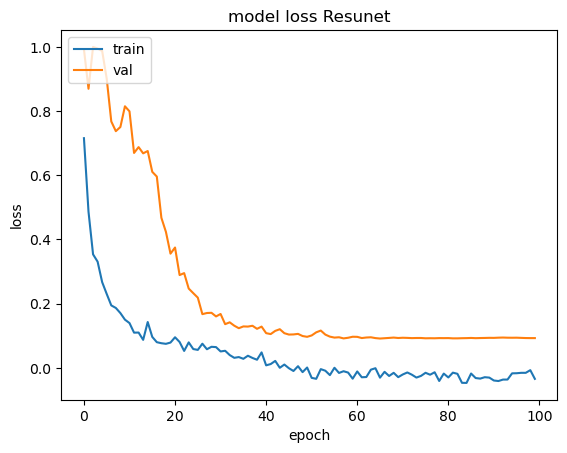

In [5]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss Resunet')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


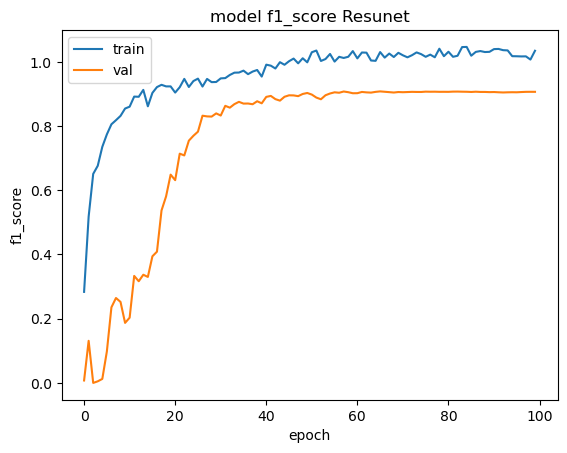

In [6]:
# summarize history for F1

plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('model f1_score Resunet')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


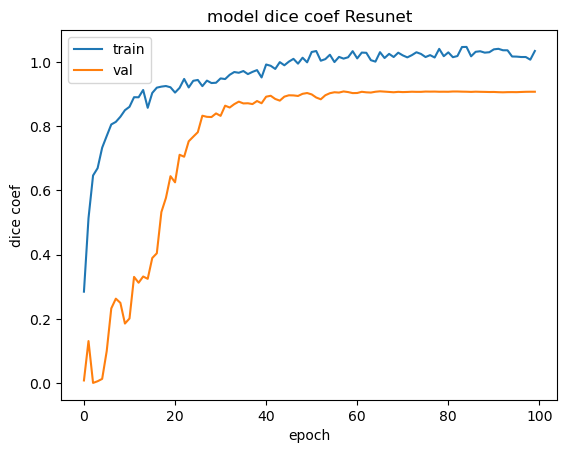

In [7]:
# summarize history for dice_coef

plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model dice coef Resunet')
plt.ylabel('dice coef')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Evaluate 

In [8]:
val_generator = DataGenerator2D('//PATH TO YOUR TEST DATA//', img_size=256,batch_size=128, shuffle=True)
model = Resunet.build_model()
model.load_weights('//PATH TO YOUR RESUNET MODEL WEIGHTS.h5//')
model.compile(loss=dice_coef_loss,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=[f1, iou , dice_coef ])
evaluate = model.evaluate(val_generator,batch_size= 60, verbose=1,)

3/3 [==============================] - 25s 5s/step - loss: 0.0571 - f1: 0.9372 - iou: 0.9195 - dice_coef: 0.9404


In [10]:
X, y = val_generator.__getitem__(0)
predict = model.predict(X)

4/4 [==============================] - 2s 191ms/step


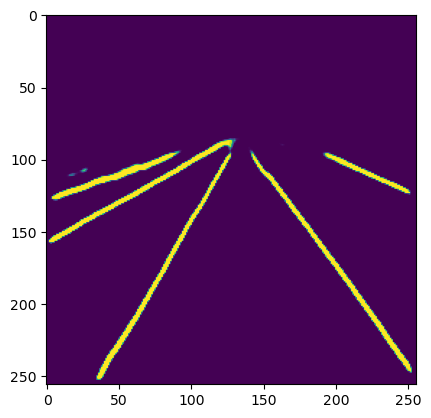

In [11]:
img = predict[2]
plt.imshow(img)

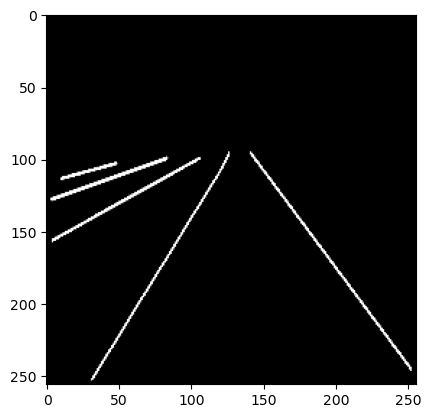

In [12]:
plt.imshow(y[2])

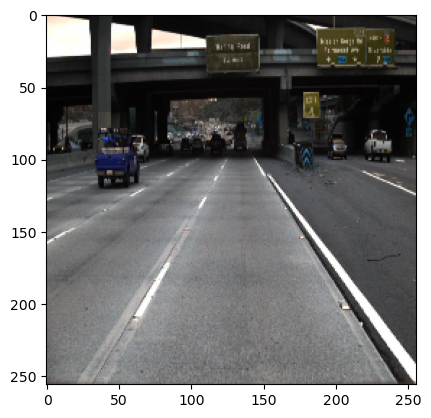

In [13]:
plt.imshow(X[2])